In [158]:
import pandas as pd
import numpy as np
import os
import string
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import StrMethodFormatter

In [175]:
#compile data from year 2010-2022
# extract same type of data from all sheet and then create a new sheet
# Replace 'your_excel_file.xlsx' with the path to your Excel file
file_path = '../../../data/raw/2022-DVMT-Comparison.xlsx'

# Read all sheets into a dictionary of DataFrames
xls = pd.ExcelFile(file_path)
sheet_names = ['2022', '2021','2020', '2019','2018', '2017','2016', '2015','2014', '2013','2012', '2011','2010']
              #'2009', '2008','2007', '2006','2005', '2004','2003', '2002','2001', '2000'] 
dataframes = {sheet_name: xls.parse(sheet_name) for sheet_name in sheet_names}

# Define the number of rows to delete from the beginning
rows_to_delete =2

# Modify each DataFrame to remove the first 'rows_to_delete' rows
for sheet_name, df in dataframes.items():
    dataframes[sheet_name] = df.iloc[rows_to_delete:]
    
# Define a function to remove rows with all NaN values
def remove_rows_with_nan(df):
    return df.dropna(how='all') 

# remove rows that only has NAN
for sheet_name, df in dataframes.items():
    dataframes[sheet_name] = remove_rows_with_nan(df)

# Replace NaN with blank ('')
for sheet_name, df in dataframes.items():
    dataframes[sheet_name] = df.fillna('')  

# Define which row to use as the index (e.g., row 0)
row_index_to_use = 0

# Set the specified row as column names
for sheet_name, df in dataframes.items():
    dataframes[sheet_name] = df.iloc[row_index_to_use + 1:]  # Skip the specified row
    dataframes[sheet_name].columns = df.iloc[row_index_to_use]  # Set the specified row as column names
    dataframes[sheet_name].reset_index(drop=True, inplace=True)   
    
# Define a column in all the datasheet to extract
common_column_name = 'TOTAL'  # Replace with the actual column name

# Create a new DataFrame to store the extracted data in separate columns
combined_data = pd.DataFrame()

# Extract the data from each sheet and put it in a separate column in combined_data
for sheet_name, df in dataframes.items():
    if common_column_name in df.columns:
        extracted_column  = df[common_column_name]
        combined_data[sheet_name] = extracted_column
        

# Reset the index for both DataFrames
combined_data.reset_index(drop=True, inplace=True)


# Insert the Series as the first and second columns in the DataFrame
df_name=dataframes['2015'].iloc[:,0]
df_types=dataframes['2015'].iloc[:,1]
combined_data.insert(0, 'Area', df_name)
combined_data.insert(1, 'Parameter', df_types)

combined_data.iat[4, 0] = "BRIDGEPORT-STAMFORD"
combined_data.iat[5, 0] = " "
combined_data.iat[12, 0] = "NEW YORK-NEWARK"
combined_data.iat[13, 0] = " "
combined_data.iat[14, 0] = "NORWICH-NEW LONDON"
combined_data.iat[15, 0] = " "

In [176]:
#clean and attached the data from year 2002 to 2009
xls = pd.ExcelFile(file_path)
sheet_names_1 = ['2009', '2008','2007', '2006','2005', '2004','2003', '2002']
#,'2001', '2000','1999'] 
dataframes_1 = {sheet_name: xls.parse(sheet_name) for sheet_name in sheet_names_1}

# Define the number of rows to delete from the beginning
rows_to_delete_1 =2

# Modify each DataFrame to remove the first 'rows_to_delete' rows
for sheet_name, df in dataframes_1.items():
    dataframes_1[sheet_name] = df.iloc[rows_to_delete:]
    
# Define a function to remove rows with all NaN values
def remove_rows_with_nan(df):
    return df.dropna(how='all') 

for sheet_name, df in dataframes_1.items():
    dataframes_1[sheet_name] = remove_rows_with_nan(df)
    
for sheet_name, df in dataframes_1.items():
    dataframes_1[sheet_name] = df.fillna('')  # Replace NaN with blank ('')

# Define which row to use as the index (e.g., row 0)
row_index_to_use = 0

# Apply the function to each DataFrame in the dictionary
for sheet_name, df in dataframes_1.items():
    dataframes_1[sheet_name] = df.iloc[row_index_to_use + 1:]  # Skip the specified row
    dataframes_1[sheet_name].columns = df.iloc[row_index_to_use]  # Set the specified row as column names
    dataframes_1[sheet_name].reset_index(drop=True, inplace=True)   
    
for sheet_name, df in dataframes_1.items():
    dataframes_1[sheet_name] =  dataframes_1[sheet_name].drop([2,3,24,25,26,27,28])
    dataframes_1[sheet_name].reset_index(drop=True, inplace=True)

# Define a common column name to extract
common_column_name = 'TOTAL'  # Replace with the actual column name

# Create a new DataFrame to store the extracted data in separate columns
combined_data_1 = pd.DataFrame()

# Extract the data from each sheet and put it in a separate column in combined_data
for sheet_name, df in dataframes_1.items():
    if common_column_name in df.columns:
        extracted_column  = df[common_column_name]
        combined_data_1[sheet_name] = extracted_column

df_name_1=dataframes_1['2002'].iloc[:,0]
df_types_1=dataframes_1['2002'].iloc[:,1]

# Reset the index for both DataFrames
combined_data_1.reset_index(drop=True, inplace=True)


# Insert the Series as the first and second columns in the DataFrame
#combined_data_1.insert(0, 'Area', df_name)
#combined_data_1.insert(1, 'Parameter', df_types)

for i in range(0,25):
    if i%2!=0:
        combined_data_1.loc[i,:]=combined_data_1.loc[i,:]*1000

In [177]:
result1 = pd.concat([combined_data, combined_data_1], axis=1)
result1

,Area,Parameter,2022,2021,2020,2019,2018,2017,2016,2015,...,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002
0,RURAL,MILES,5556.22,5555.67,5693.45,5689.13,5691.04,5690.56,5689.07,5683.08,...,6251.92,6217,6240,6227,6186,6167,6153,6137,6119,6109
1,,DVMT,8240283,7830675,8023214,8736133,8654717,8613759,8636505,8652561,...,10709602,10691,10681000,10721000,10854000,10715000,10745000,10804000,10823000,10551000
2,SMALL URBAN,MILES,823.43,823.4,820.57,820.65,823.91,823.5,823.12,823.14,...,904.69,902,901,898,898,894,893,890,884,885
3,,DVMT,2337314,2259392,2272430,2469706,2504970,2520821,2524463,2607688,...,2868533,2859,2849000,2882000,2925000,2909000,2914000,2927000,2930000,2917000
4,BRIDGEPORT-STAMFORD,MILES,4060.3,4060.03,4064.46,4064.29,4049.43,4048.01,4048.73,4046.99,...,3958.17,3957,3955,3952,3950,3944,3941,3935,3926,3922
5,,DVMT,19611771,19157295,18807111,20546066,20446389,20355849,20581203,20612267,...,19976995,19998,20008000,20285000,20604000,20491000,20323000,20182000,19933000,20037000
6,DANBURY,MILES,905.95,905.73,906.83,906.84,905.26,905.23,905.25,905.05,...,834.99,835,834,830,830,825,822,821,821,817
7,,DVMT,3773577,3635983,3774256,4017558,4016316,4026458,4010428,3985081,...,3616175,3621,3807000,3666000,3676000,3622000,3646000,3667000,3701000,3617000
8,HARTFORD,MILES,4417.56,4413.77,4427.77,4425.68,4418.03,4414.64,4410.17,4405.12,...,4125.255,4115,4112,4103,4083,4079,4060,4054,4041,4022
9,,DVMT,21708099,21542323,23032106,23620909,23668295,23589318,23486033,23475375,...,22238933,22334,22323000,22429000,22660000,22459000,22281000,22182000,22064000,21895000


In [178]:
#clean and attached the data from year 1999 to 2001
xls = pd.ExcelFile(file_path)
sheet_names_4 = ['2001','2000','1999']
#,'2001', '2000','1999'] 
dataframes_4 = {sheet_name: xls.parse(sheet_name) for sheet_name in sheet_names_4}

# Define the number of rows to delete from the beginning
rows_to_delete=2

# Modify each DataFrame to remove the first 'rows_to_delete' rows
for sheet_name, df in dataframes_4.items():
    dataframes_4[sheet_name] = df.iloc[rows_to_delete:]
    
# Define a function to remove rows with all NaN values
def remove_rows_with_nan(df):
    return df.dropna(how='all') 

for sheet_name, df in dataframes_4.items():
    dataframes_4[sheet_name] = remove_rows_with_nan(df)
    
for sheet_name, df in dataframes_4.items():
    dataframes_4[sheet_name] = df.fillna('')  # Replace NaN with blank ('')

    # Define which row to use as the index (e.g., row 0)
row_index_to_use = 0

# Apply the function to each DataFrame in the dictionary
for sheet_name, df in dataframes_4.items():
    dataframes_4[sheet_name] = df.iloc[row_index_to_use + 1:]  # Skip the specified row
    dataframes_4[sheet_name].columns = df.iloc[row_index_to_use]  # Set the specified row as column names
    dataframes_4[sheet_name].reset_index(drop=True, inplace=True)   
    
for sheet_name, df in dataframes_4.items():
    dataframes_4[sheet_name] =  dataframes_4[sheet_name].drop([2,3,30,31,32,33,34])
    dataframes_4[sheet_name].reset_index(drop=True, inplace=True)

# Define a common column name to extract
common_column_name = 'TOTAL'  # Replace with the actual column name

# Create a new DataFrame to store the extracted data in separate columns
combined_data_4 = pd.DataFrame()

# Extract the data from each sheet and put it in a separate column in combined_data
for sheet_name, df in dataframes_4.items():
    if common_column_name in df.columns:
        extracted_column  = df[common_column_name]
        combined_data_4[sheet_name] = extracted_column

#df_name_1=dataframes_1['2001'].iloc[:,0]
#df_types_1=dataframes_1['2001'].iloc[:,1]

# Reset the index for both DataFrames
combined_data_4.reset_index(drop=True, inplace=True)


# Insert the Series as the first and second columns in the DataFrame
#combined_data_1.insert(0, 'Area', df_name)
#combined_data_1.insert(1, 'Parameter', df_types)
for i in range(0,30):
    if i%2!=0:
        combined_data_4.loc[i,:]=combined_data_4.loc[i,:]*1000
        
# Insert the Series as the first and second columns in the DataFrame
df_name2=dataframes_4['1999'].iloc[:,0]
df_types2=dataframes_4['1999'].iloc[:,1]
combined_data_4 .insert(0, 'Area', df_name2)
combined_data_4 .insert(1, 'Parameter', df_types2)

In [179]:
#extract the data from 1994 to 1998
xls = pd.ExcelFile(file_path)
sheet_names_2 = ['1998','1997','1996','1995','1994 ']
                 #'1993 ','1992','1991','1990','1989','1988','1987','1986','1985','1984','1983','1982','1981','1980'] 
dataframes_2 = {sheet_name: xls.parse(sheet_name) for sheet_name in sheet_names_2}

#extract the data from 1994 to 1998
xls = pd.ExcelFile(file_path)
sheet_names_2 = ['1998','1997','1996','1995','1994 ']
                 #'1993 ','1992','1991','1990','1989','1988','1987','1986','1985','1984','1983','1982','1981','1980'] 
dataframes_2 = {sheet_name: xls.parse(sheet_name) for sheet_name in sheet_names_2}

    
# Define a function to remove rows with all NaN values
def remove_rows_with_nan(df):
    return df.dropna(how='all') 

for sheet_name, df in dataframes_2.items():
    dataframes_2[sheet_name] = remove_rows_with_nan(df)
    
for sheet_name, df in dataframes_2.items():
    dataframes_2[sheet_name] = df.fillna('')  # Replace NaN with blank ('')
    
# Define which row to use as the index (e.g., row 0)
row_index_to_use = 0

# Apply the function to each DataFrame in the dictionary
for sheet_name, df in dataframes_2.items():
    dataframes_2[sheet_name] = df.iloc[row_index_to_use + 1:]  # Skip the specified row
    dataframes_2[sheet_name].columns = df.iloc[row_index_to_use]  # Set the specified row as column names
    dataframes_2[sheet_name].reset_index(drop=True, inplace=True)  
    
for sheet_name, df in dataframes_2.items():
    dataframes_2[sheet_name] =  dataframes_2[sheet_name].drop([2,3,30,31,32,33,34])
    dataframes_2[sheet_name].reset_index(drop=True, inplace=True)
    
# Define a common column name to extract
common_column_name = 'TOTAL'  # Replace with the actual column name

# Create a new DataFrame to store the extracted data in separate columns
combined_data_2 = pd.DataFrame()

# Extract the data from each sheet and put it in a separate column in combined_data
for sheet_name, df in dataframes_2.items():
    if common_column_name in df.columns:
        extracted_column  = df[common_column_name]
        combined_data_2[sheet_name] = extracted_column
combined_data_2

df_name_2=dataframes_2['1998'].iloc[:,0]
df_types_2=dataframes_2['1998'].iloc[:,1]

# Reset the index for both DataFrames
combined_data_2.reset_index(drop=True, inplace=True)


# Insert the Series as the first and second columns in the DataFrame
#combined_data_1.insert(0, 'Area', df_name)
#combined_data_1.insert(1, 'Parameter', df_types)

for i in range(0,33):
    if i%2!=0:
        combined_data_2.loc[i,:]=combined_data_2.loc[i,:]*1000

In [180]:
#extract the data at 1993
xls = pd.ExcelFile(file_path)
sheet_names_5 = ['1993 ']
                 #'1993 ','1992','1991','1990','1989','1988','1987','1986','1985','1984','1983','1982','1981','1980'] 
dataframes_5 = {sheet_name: xls.parse(sheet_name) for sheet_name in sheet_names_5}

#rows_to_delete_1 =0


# Modify each DataFrame to remove the first 'rows_to_delete' rows
#for sheet_name, df in dataframes_2.items():
    #dataframes_2[sheet_name] = df.iloc[rows_to_delete:]
    
# Define a function to remove rows with all NaN values
def remove_rows_with_nan(df):
    return df.dropna(how='all') 

for sheet_name, df in dataframes_5.items():
    dataframes_5[sheet_name] = remove_rows_with_nan(df)
    
for sheet_name, df in dataframes_5.items():
    dataframes_5[sheet_name] = df.fillna('')  # Replace NaN with blank ('')
    
# Define which row to use as the index (e.g., row 0)
row_index_to_use = 0

# Apply the function to each DataFrame in the dictionary
for sheet_name, df in dataframes_5.items():
    dataframes_5[sheet_name] = df.iloc[row_index_to_use + 1:]  # Skip the specified row
    dataframes_5[sheet_name].columns = df.iloc[row_index_to_use]  # Set the specified row as column names
    dataframes_5[sheet_name].reset_index(drop=True, inplace=True)  

for sheet_name, df in dataframes_5.items():
    dataframes_5[sheet_name] =  dataframes_5[sheet_name].drop([2,5,8,13,16,19,22,25,28,31,38,39,40,41,42,43,44])
    dataframes_5[sheet_name].reset_index(drop=True, inplace=True)
    
# Define a common column name to extract
common_column_name = 'TOTAL'  # Replace with the actual column name

# Create a new DataFrame to store the extracted data in separate columns
combined_data_5 = pd.DataFrame()

# Extract the data from each sheet and put it in a separate column in combined_data
for sheet_name, df in dataframes_5.items():
    if common_column_name in df.columns:
        extracted_column  = df[common_column_name]
        combined_data_5[sheet_name] = extracted_column
combined_data_5

#df_name_2=dataframes_2['1998'].iloc[:,0]
#df_types_2=dataframes_2['1998'].iloc[:,1]

# Reset the index for both DataFrames
combined_data_5.reset_index(drop=True, inplace=True)


# Insert the Series as the first and second columns in the DataFrame
#combined_data_1.insert(0, 'Area', df_name)
#combined_data_1.insert(1, 'Parameter', df_types)

for i in range(0,30):
    if i%2!=0:
        combined_data_5.loc[i,:]=combined_data_5.loc[i,:]*1000

In [181]:
#extract the data from 1992 to 1990
xls = pd.ExcelFile(file_path)
sheet_names_3 = ['1992','1991','1990','1989','1988','1987','1986','1985','1984','1983','1982','1981'] 
dataframes_3 = {sheet_name: xls.parse(sheet_name) for sheet_name in sheet_names_3}

#rows_to_delete_1 =0


# Modify each DataFrame to remove the first 'rows_to_delete' rows
#for sheet_name, df in dataframes_2.items():
    #dataframes_2[sheet_name] = df.iloc[rows_to_delete:]
    
# Define a function to remove rows with all NaN values
def remove_rows_with_nan(df):
    return df.dropna(how='all') 

for sheet_name, df in dataframes_3.items():
    dataframes_3[sheet_name] = remove_rows_with_nan(df)
    
for sheet_name, df in dataframes_3.items():
    dataframes_3[sheet_name] = df.fillna('')  # Replace NaN with blank ('')
    
# Define which row to use as the index (e.g., row 0)
row_index_to_use = 0

# Apply the function to each DataFrame in the dictionary
for sheet_name, df in dataframes_3.items():
    dataframes_3[sheet_name] = df.iloc[row_index_to_use + 1:]  # Skip the specified row
    dataframes_3[sheet_name].columns = df.iloc[row_index_to_use]  # Set the specified row as column names
    dataframes_3[sheet_name].reset_index(drop=True, inplace=True)  
    
for sheet_name, df in dataframes_3.items():
    dataframes_3[sheet_name] =  dataframes_3[sheet_name].drop([2,3,30,31,32,33,34,35])
    dataframes_3[sheet_name].reset_index(drop=True, inplace=True)
    
# Define a common column name to extract
common_column_name = 'TOTAL'  # Replace with the actual column name

# Create a new DataFrame to store the extracted data in separate columns
combined_data_3 = pd.DataFrame()

# Extract the data from each sheet and put it in a separate column in combined_data
for sheet_name, df in dataframes_3.items():
    if common_column_name in df.columns:
        extracted_column  = df[common_column_name]
        combined_data_3[sheet_name] = extracted_column

#df_name_3=dataframes_3['1993 '].iloc[:,0]
#df_types_3=dataframes_3['1993 '].iloc[:,1]

# Reset the index for both DataFrames
combined_data_3.reset_index(drop=True, inplace=True)


# Insert the Series as the first and second columns in the DataFrame
#combined_data_1.insert(0, 'Area', df_name)
#combined_data_1.insert(1, 'Parameter', df_types)

for i in range(0,32):
    if i%2!=0:
        combined_data_3.loc[i,:]=combined_data_3.loc[i,:]*1000

In [182]:
#combine year 2001 to 1990
result2 = pd.concat([combined_data_4, combined_data_2, combined_data_5, combined_data_3], axis=1)
result2

,Area,Parameter,2001,2000,1999,1998,1997,1996,1994,1993,...,1990,1989,1988,1987,1986,1985,1984,1983,1982,1981
0,RURAL,MILES,9072,9041,9014,8984,8956,8920,8829,8814,...,9086,9045,8988,8949,8930,8909,8889,8876,9423,9401
1,,DVMT,20864000,20651000,20077000,19900000,19197000,18852000,17395000,18014000,...,18077000,18069000,17888000,17664000,15811000,14844000,13630000,13488000,13739000,14231000
2,SMALL URBAN,MILES,397,396,388,387,387,387,382,382,...,455,454,453,452,453,453,453,453,440,439
3,,DVMT,1177000,1183000,1137000,1122000,1097000,1100000,1083000,1198000,...,1295000,1307000,1300000,1497000,1397000,1150000,1262000,1119000,1197000,1010000
4,BRIDGEPORT,MILES,1799,1795,1794,1789,1787,1781,1764,1762,...,1700,1697,1689,1683,1681,1673,1668,1664,1632,1625
5,,DVMT,8807000,8531000,8428000,8211000,8130000,8052000,7592000,7542000,...,7854000,7896000,7948000,7830000,7395000,6472000,6384000,6351000,6288000,5469000
6,BRISTOL,MILES,361,359,359,358,356,357,351,347,...,320,318,314,312,311,308,306,305,280,279
7,,DVMT,1010000,1001000,975000,957000,943000,943000,884000,973000,...,869000,872000,858000,790000,631000,755000,708000,739000,692000,592000
8,DANBURY,MILES,841,835,831,825,825,823,814,815,...,800,800,798,797,795,796,792,787,740,738
9,,DVMT,4064000,4034000,3979000,3914000,3645000,3564000,3485000,3340000,...,3198000,3220000,3100000,3723000,2923000,2760000,2758000,2693000,2577000,2293000


In [183]:
result1.to_csv('../../../data/tidy/vmt-urbanized-area-2002to2022.csv')
result2.to_csv('../../../data/tidy/vmt-urbanized-area-1990to2001.csv')

In [202]:
#get the total DVMT data for year 1966 to 1980
xls = pd.ExcelFile(file_path)
sheet_names = ['1980','OLD DVMT']
dataframes = {sheet_name: xls.parse(sheet_name) for sheet_name in sheet_names}

DVMT_1980 = dataframes['1980'].iat[40,-1]*1000

DVMT_1966to1979 = dataframes['OLD DVMT'].iloc[2:16].reset_index(drop=True)
DVMT_1966to1979

result1.iloc[23,:]
result2.iloc[29,:]

Area                 
Parameter        DVMT
2001         84279000
2000         83366000
1999         81630000
1998         79936000
1997         78202000
1996         76874000
1994         74352000
1993         74025000
1992         72293000
1991         72948000
1990         72072000
1989         71733000
1988         71205000
1987         73356000
1986         65902000
1985         61338000
1984         57582000
1983         56521000
1982         55171000
1981         53055000
Name: 29, dtype: object

KeyError: 'marker'

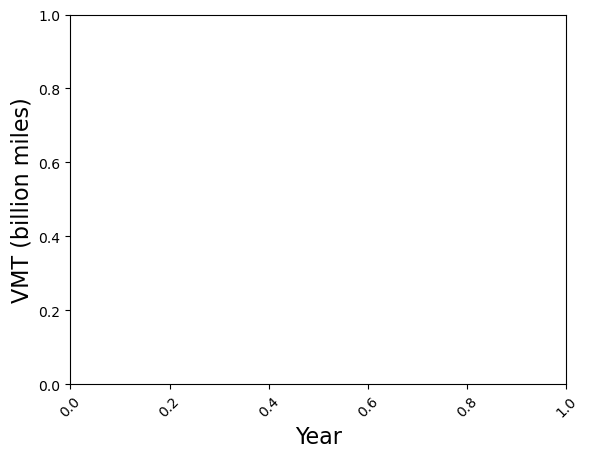

In [79]:
#plot the VMT over three decades



# Set plot labels and title
plt.xlabel('Year',fontsize=16)
plt.ylabel('VMT (billion miles)',fontsize=16)
plt.xticks(rotation=45)
# Increase x-tick interval

column_names = result.columns[2:22]


# Plot each dataset in the list

for i in range(0, 23):
    # Check if i is odd
    if i % 2 != 0:
        # Loop through the indices of label_names
            # Create a line plot using Seaborn
            sns.lineplot(
                x=column_names[::-1],
                y=(reversed_result.iloc[i][8:28]*365)/ 1000000000,  # Assuming you want to divide by 1,000,000
                label=reversed_result.iloc[:,29][i-1],
                marker=reversed_result['marker'][i]
            )


# Add a legend
plt.legend()


#desired_interval = 4  # Change this to your desired interval

# Specify the x-tick locations
#plt.xticks(np.arange(0, len(x), desired_interval))

# Reverse the x-axis and invert the y-axis
# plt.gca().invert_yaxis()
# Increase the size of x-axis and y-axis ticks
tick_size = 14  # Adjust the tick size as needed

# Increase the size of x-axis ticks
plt.tick_params(axis='x', which='both', labelsize=tick_size)

# Increase the size of y-axis ticks
plt.tick_params(axis='y', which='both', labelsize=tick_size)

# Increase the distance between x-axis and y-axis ticks and labels
tick_label_pad = 9  # Adjust the padding distance as needed

# Increase the distance for x-axis ticks and labels
plt.tick_params(axis='x', which='both', pad=tick_label_pad)

# Increase the distance for y-axis ticks and labels
plt.tick_params(axis='y', which='both', pad=tick_label_pad)

# Increase the size of the legend
legend_font_size = 12  # Adjust the font size as needed
plt.legend(fontsize=legend_font_size)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

desired_interval = 3  # Change this to your desired interval
tick_positions = np.arange(0, len(column_names), desired_interval)
tick_labels = column_names[::-desired_interval]  # Adjust the labels accordingly

plt.xticks(tick_positions, tick_labels, rotation=45)



# Show the plot
#plt.show()
plt.savefig('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/figures/DVMT_urbanized_29years.png', dpi=100,bbox_inches='tight')